In [1]:
import os
from PIL import Image
import torch
from torch import autocast
import diffusers
from diffusers.training_utils import enable_full_determinism
from inpainting import StableDiffusionInpaintingPipeline

In [2]:
diffusers.__version__, torch.__version__

('0.2.4', '1.11.0')

In [3]:
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:8"

In [4]:
device = "cuda:0"
pipe = StableDiffusionInpaintingPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [5]:
init_image = Image.open("sample_image.png").resize((512,512)).convert('RGB')
mask_image = Image.open("sample_mask.png").resize((512,512)).convert('RGB')

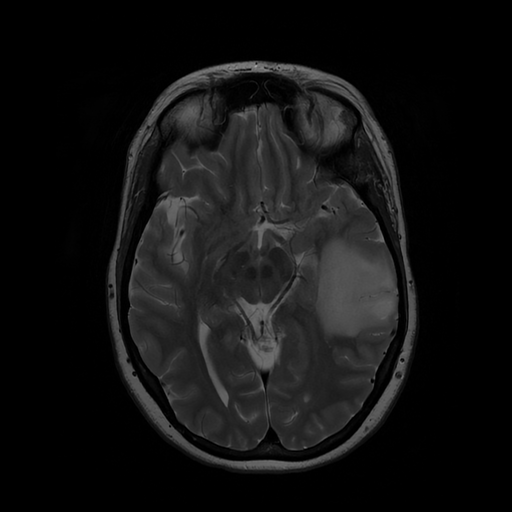

In [6]:
init_image

0it [00:00, ?it/s]

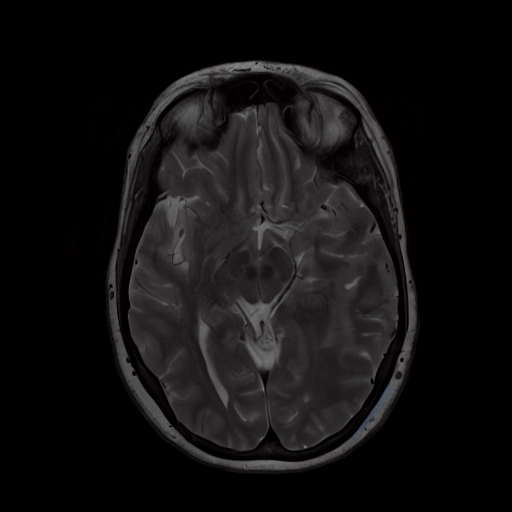

In [7]:
prompt = "An MRI of the brain"
with autocast("cuda"):
    enable_full_determinism(123)
    images = pipe(prompt=prompt, 
              init_image=init_image, 
              num_inference_steps = 150,
              mask_image=mask_image, 
              strength=0.85,
              guidance_scale = 0.85)["sample"]

images[0]

In [8]:
images[0].save("sample_image-diffused.png")